# Exploring Education in India
Census 2011 report named “Provisional Population Totals, Census of India 2011 Cities having population 1 lakh and above” . It contains nearly 500 yearly Indian cities with population more than 1 lac , In general the cities that will define the future of India . 

In [4]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
#from mpl_toolkits.basemap import Basemap
import seaborn as sns
sns.set_style("darkgrid")
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
%matplotlib inline

In [5]:
data = pd.read_csv('cities_r2.csv')

In [6]:
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


## Education based on Demographics

In [4]:
data['latitude'] = data['location'].apply(lambda x: float(x.split(',')[0]))
data['longitude'] = data['location'].apply(lambda x: float(x.split(',')[1]))

In [28]:
def plot_literacy_population(sizes, colorVal):
    f, ax = plt.subplots(figsize=(12,9))
    map = Basemap(width=5000000,
                  height=3500000,
                  resolution='l',
                  projection='aea',
                  llcrnrlon=69,
                  llcrnrlat=6,
                  urcrnrlon=99,
                  urcrnrlat=36,
                  lon_0=78,
                  lat_0=20,
                  ax=ax)
    map.drawmapboundary(fill_color='white')
    map.drawcountries(color='white')
    map.bluemarble()
    x, y = map(array(data["longitude"]), array(data["latitude"]))
    cs = map.scatter(x, y, s=sizes, marker="o", c=sizes, cmap=cm.PuBu, alpha=0.5)
    cbar = map.colorbar(cs, location='right',pad="5%")
    cbar.ax.set_yticklabels(colorVal)
    plt.figure(figsize=(30,30))
    plt.show()

### Population Demographic

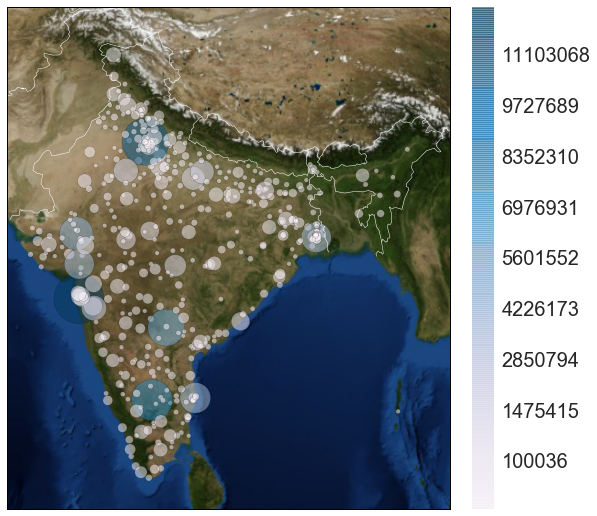

In [29]:
population_by_region = data['population_total'].apply(lambda x: int(x / 5000))
colorVal = np.linspace(data["population_total"].min(), data["population_total"].max(), 
                            num=10)
colorVal = colorVal.astype(int)

plot_literacy_population(population_by_region, colorVal) #Change cmap to Dark2

### Graduates Demographic

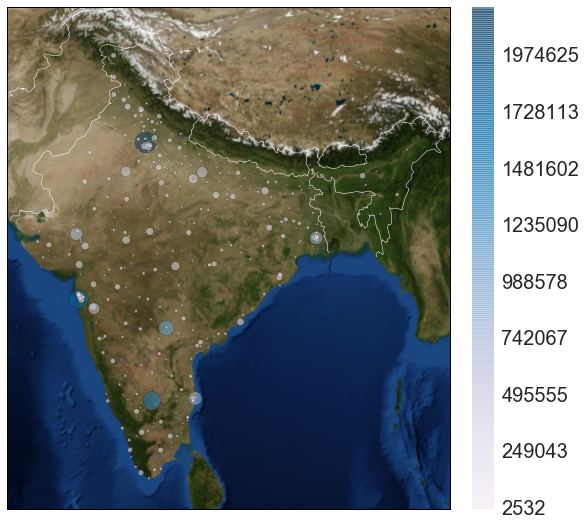

In [30]:
graduates_by_region = data['total_graduates'].apply(lambda x: int(x / 5000))
colorVal = np.linspace(data["total_graduates"].min(), data["total_graduates"].max(), 
                            num=10)
colorVal = colorVal.astype(int)

plot_literacy_population(graduates_by_region, colorVal) #Changed cmap to cool

### Literacy by Demographics

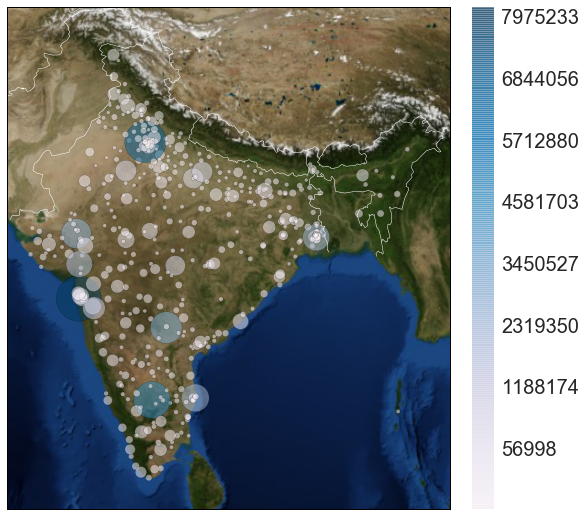

In [31]:
literacy_by_region = data['literates_total'].apply(lambda x: int(x / 5000))
colorVal = np.linspace(data["literates_total"].min(), data["literates_total"].max(), 
                            num=10)
colorVal = colorVal.astype(int)

plot_literacy_population(literacy_by_region, colorVal) #Changed cmap to cool

### Effective Literacy by States
Literacy by states (%)

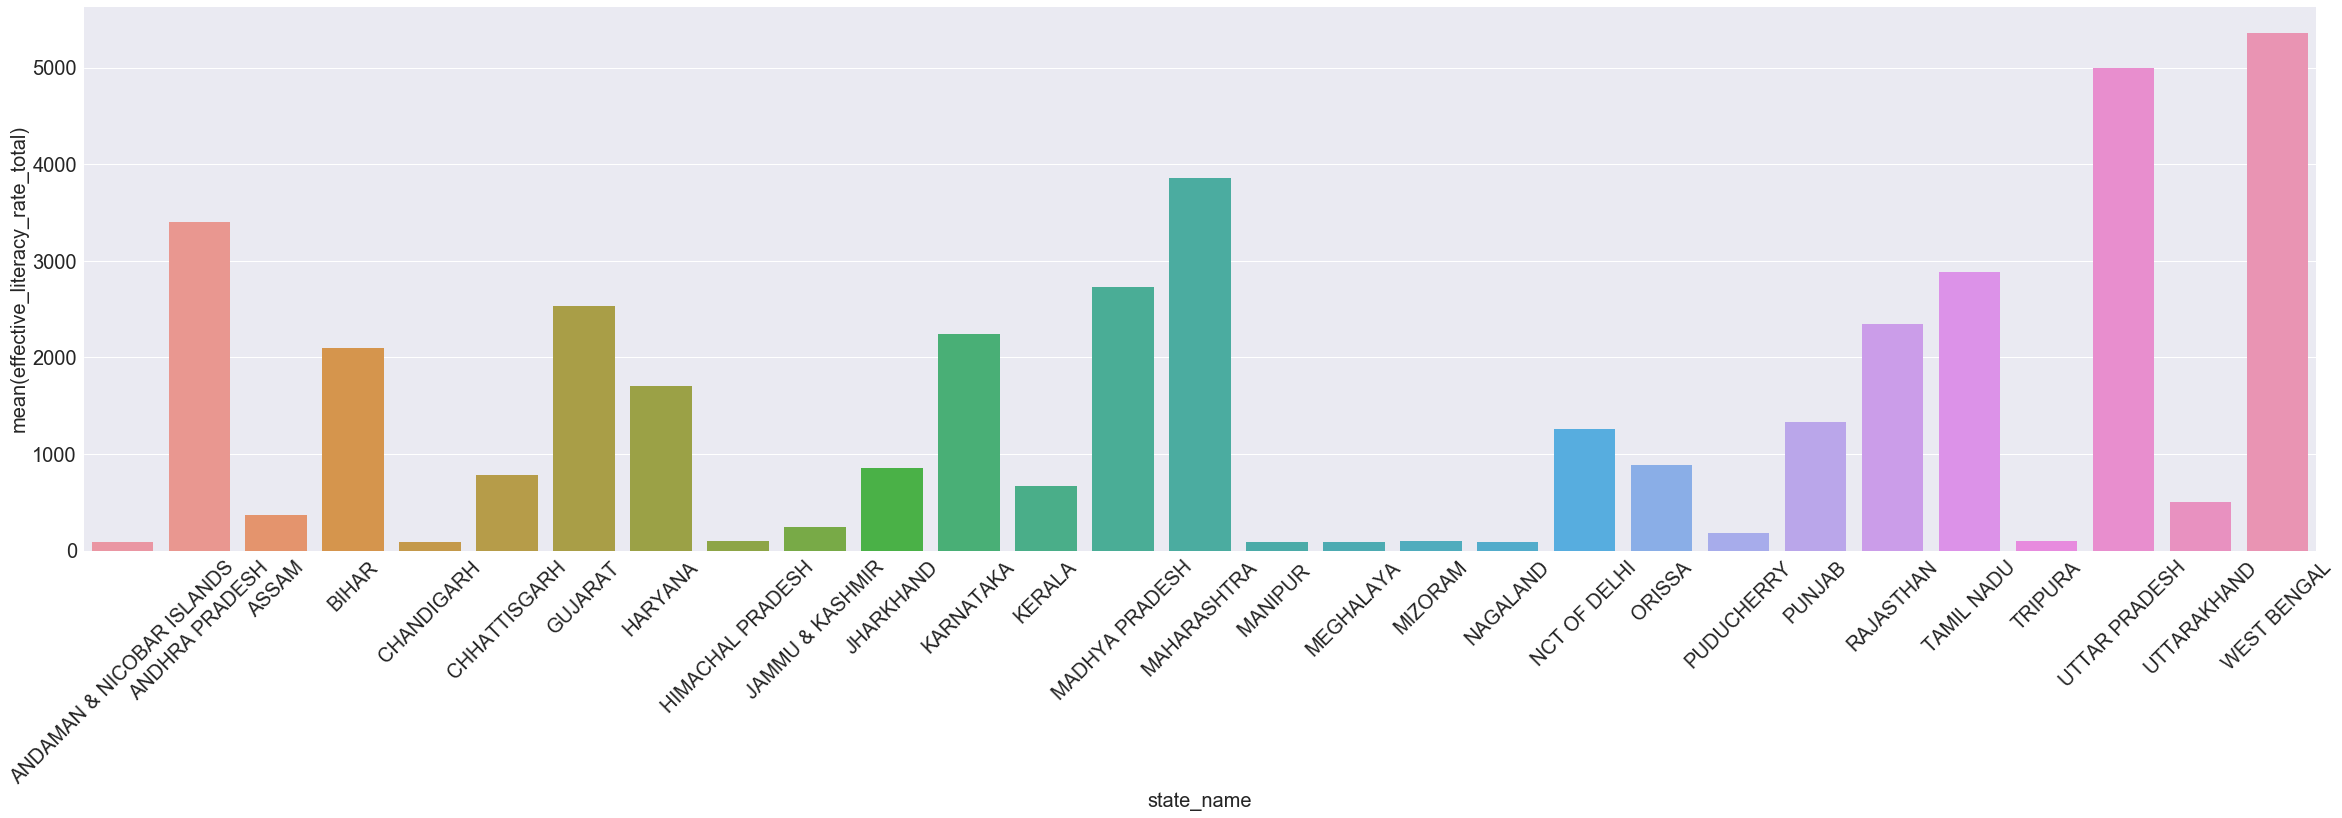

In [7]:
states = data[['effective_literacy_rate_total','state_name']].groupby('state_name',as_index=False).sum()
plt.figure(figsize=(40,10))
sns.barplot(x='state_name',y='effective_literacy_rate_total',data=states)
plt.xticks(rotation=45)
plt.show()

To be continued

In [13]:
print (data.columns)
print (data.shape)

Index(['name_of_city', 'state_code', 'state_name', 'dist_code',
       'population_total', 'population_male', 'population_female',
       '0-6_population_total', '0-6_population_male', '0-6_population_female',
       'literates_total', 'literates_male', 'literates_female', 'sex_ratio',
       'child_sex_ratio', 'effective_literacy_rate_total',
       'effective_literacy_rate_male', 'effective_literacy_rate_female',
       'location', 'total_graduates', 'male_graduates', 'female_graduates'],
      dtype='object')
(493, 22)


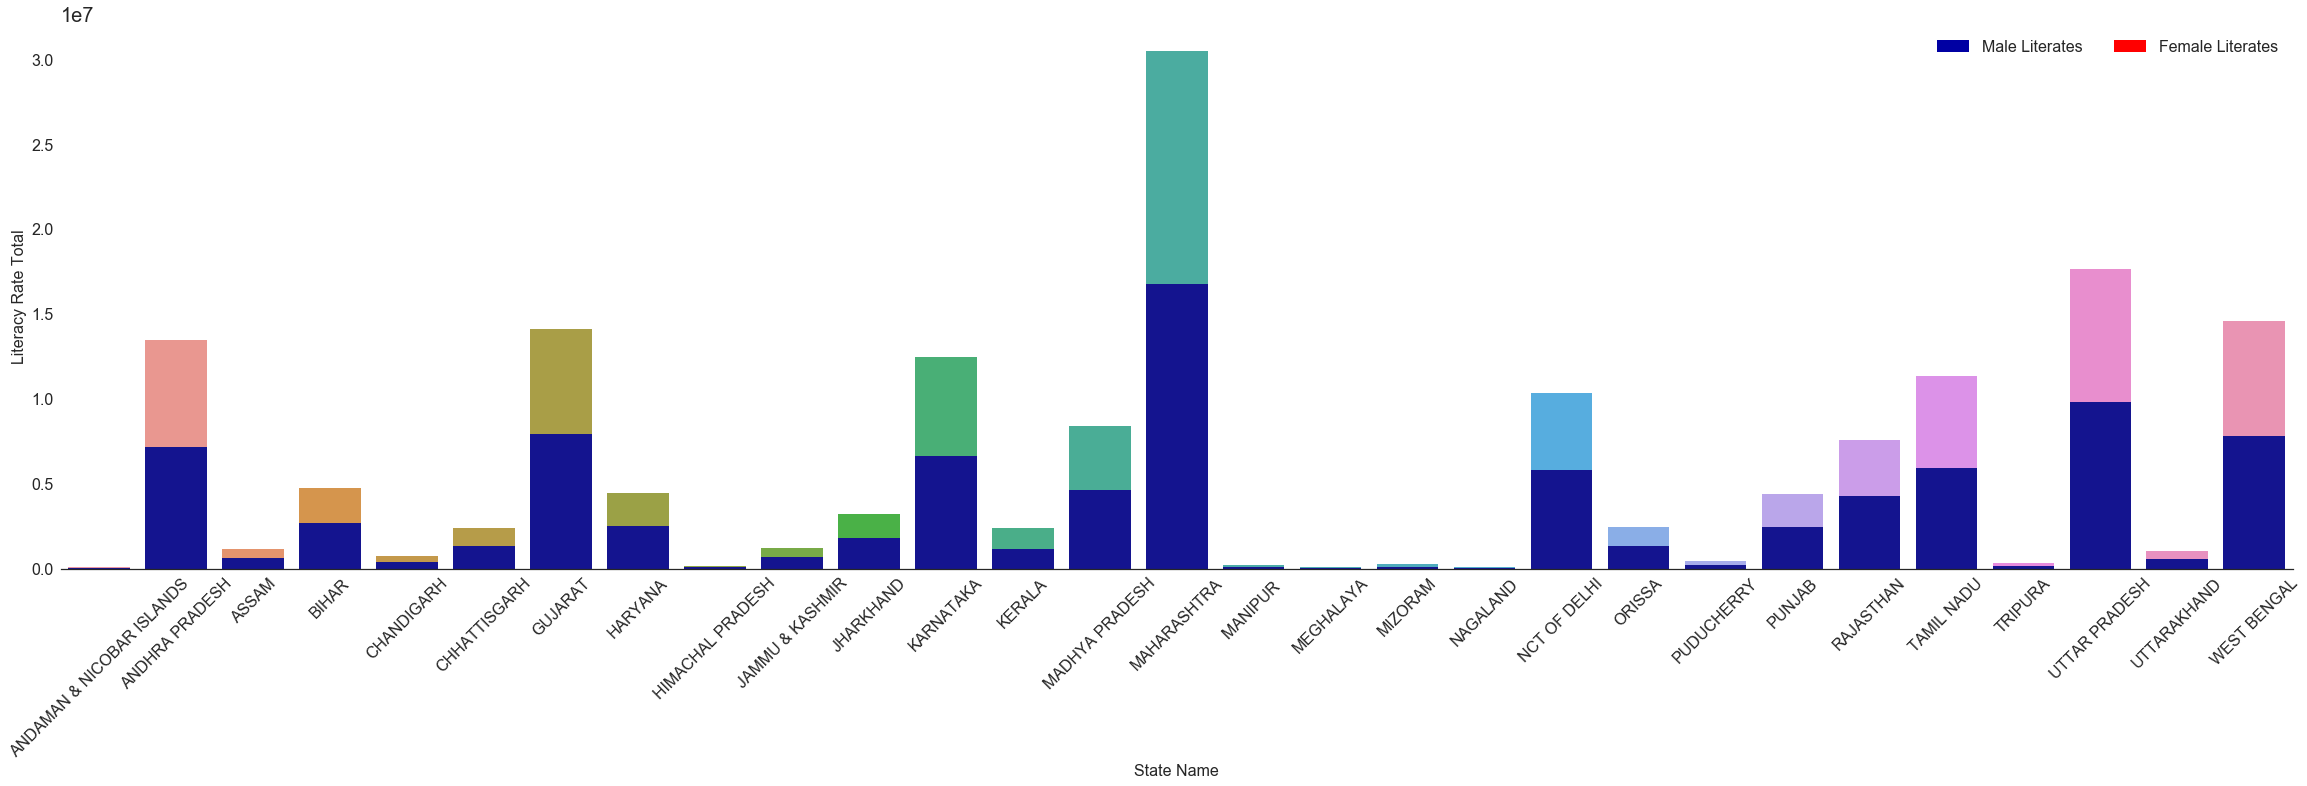

In [23]:
states = data[['literates_total','literates_male', 'state_name']].groupby('state_name',as_index=False).sum()
plt.figure(figsize=(40,10))

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = 'state_name', y = 'literates_total', data=states)

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = 'state_name', y = 'literates_male', data=states, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Male Literates', 'Female Literates'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Literacy Rate Total")
bottom_plot.set_xlabel("State Name")

for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

plt.xticks(rotation=45)
plt.show()

#### Relation between Total Graduates and literacy rate in a state

In [24]:
mean_graduates = data.total_graduates.mean() 
max_graduates = data.total_graduates.max()
min_graduates = data.total_graduates.min()
graduates_data = data['total_graduates'].apply(lambda x: (x - mean_graduates ) / (max_graduates -min_graduates ))

In [25]:
mean_literates = data.literates_total.mean() 
max_literates = data.literates_total.max()
min_literates = data.literates_total.min()
literates_data = data['literates_total'].apply(lambda x: (x - mean_literates ) / (max_literates -min_literates ))

In [28]:
mean_literates1 = data.effective_literacy_rate_total.mean() 
max_literates1 = data.effective_literacy_rate_total.max()
min_literates1 = data.effective_literacy_rate_total.min()
literates_data1 = data['effective_literacy_rate_total'].apply(lambda x: (x - mean_literates1 ) / (max_literates1 -min_literates1 ))

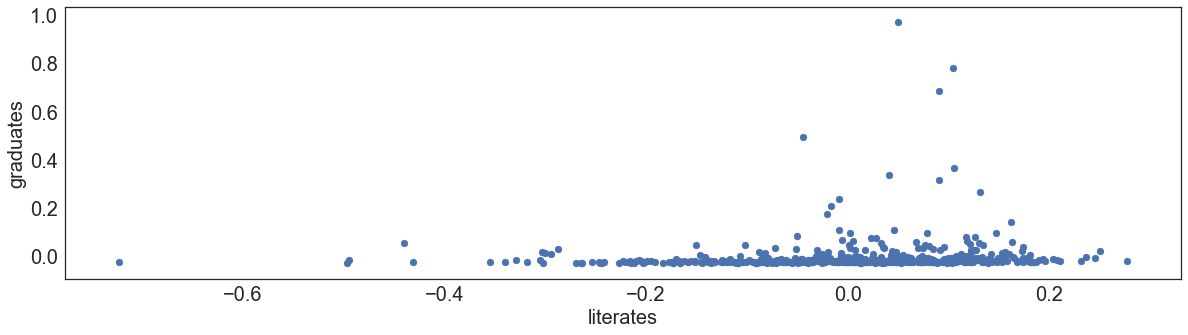

In [30]:
plt.figure(figsize=(20,5))
plt.scatter(literates_data1,graduates_data)
plt.xlabel('literates')
plt.ylabel('graduates')
plt.show()